In [107]:
# 참고
# activity 파일에는 다른 데는 없는 bs 서버 정보가 있는데 담긴 정보도 없고 다른 파일에는 아예 없어서 지우겠음

In [3]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [381]:
# 파일 불러오기
def load_all():
    train_activity = pd.read_csv('./train_activity.csv')
    train_combat = pd.read_csv('./train_combat.csv')
    train_payment = pd.read_csv('./train_payment.csv')
    train_trade = pd.read_csv('./train_trade.csv')
    train_pledge = pd.read_csv('./train_pledge.csv')
    train_label = pd.read_csv('./train_label_add.csv')
    return train_activity, train_combat, train_payment, train_trade, train_pledge, train_label

In [382]:
train_activity, train_combat, train_payment, train_trade, train_pledge, train_label = load_all()

In [383]:
train_activity = train_activity[train_activity['server']!='bs']
train_activity = train_activity[train_activity['playtime']!=0]

In [ ]:
# 최대 고민: 캐릭터를 압축 손실을 어찌 매꾸나

### 1. 모든 변수를 접속횟수로 나누기 = 효과 없음
## 2. 모든 변수를 접속 캐릭터 개수로 나누기 [보류]
### 3. 주케와 부케로 나눠서 값 구하기 = 효과 있음
## 4. 전투로 인해 죽었는가, 사냥에서 죽었는가 (어려움)
## 5. 경험치 고려하기 [보류]
# 6. 접속일을 가지고 유사도 비교해서 군집화? (접속패턴)
# 7. 플래이타임을 가지고 유사도 비교해서 군집화?
### 7. 생존과 부활 차이 = 효과 있음
## 8. 첫 접속날의 게임머니 - 마지막 접속날의 게임 머니? [제거]
## 9. 접속 중단 횟수
## 10. 지불여부 (쓸모 없을 듯)
# 11. 전투유형 시계열 군집: 접속 안 한 날은 접속안함으로 정의
# 12. 해당일자의 캐릭터 직업별 플레이시간
### 13. 전체 특성 일수 세기

In [380]:
train_activity.shape

(0, 17)

In [294]:
train_combat.shape

(1574671, 13)

In [77]:
act_combat = pd.merge(train_activity, train_combat, on =['acc_id','char_id','day','server'], how='outer')

In [78]:
act_combat.shape

(1593509, 26)

In [81]:
act_combat[act_combat['level'].isnull()]

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,...,enchant_count,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
33,1,87786,326791,aa,0.002341,0.0,0.0,0.0,0.000000,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4199,1,28171,326791,ac,0.002341,0.0,0.0,0.0,0.000000,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4462,1,71463,326791,ac,0.002341,0.0,0.0,0.0,0.000000,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8684,1,16670,326791,ae,0.002341,0.0,0.0,0.0,0.000000,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10086,1,111045,383618,af,0.002341,0.0,0.0,0.0,0.000000,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11668,1,43486,151421,ag,0.002341,0.0,0.0,0.0,0.000000,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13038,1,108063,151421,ah,0.002341,0.0,0.0,0.0,0.000000,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13170,1,92785,151421,ah,0.002341,0.0,0.0,0.0,0.000000,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13312,1,90566,383618,ah,0.002341,0.0,0.0,0.0,0.000000,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13325,1,64953,326791,ah,0.002341,0.0,0.0,0.0,0.000000,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
train_activity[train_activity['acc_id']==2]

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
37347,1,2,233598,au,2.703457,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.462447,1.024810,0.0
91681,2,2,233598,au,3.363522,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.149118,-1.044201,0.0
146496,3,2,233598,au,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.183447,0.451317,0.0
201273,4,2,233598,au,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.131992,-0.007230,0.0
256953,5,2,233598,au,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.135698,0.015398,0.0
312103,6,2,233598,au,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.134957,-0.003800,0.0
367552,7,2,233598,au,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.135230,-0.364260,0.0
424045,8,2,233598,au,2.768995,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.544370,-0.006619,0.0
479835,9,2,233598,au,3.361181,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.072071,-0.010979,0.0
535631,10,2,233598,au,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.145177,-0.182742,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B70A335128>,
      dtype=object)

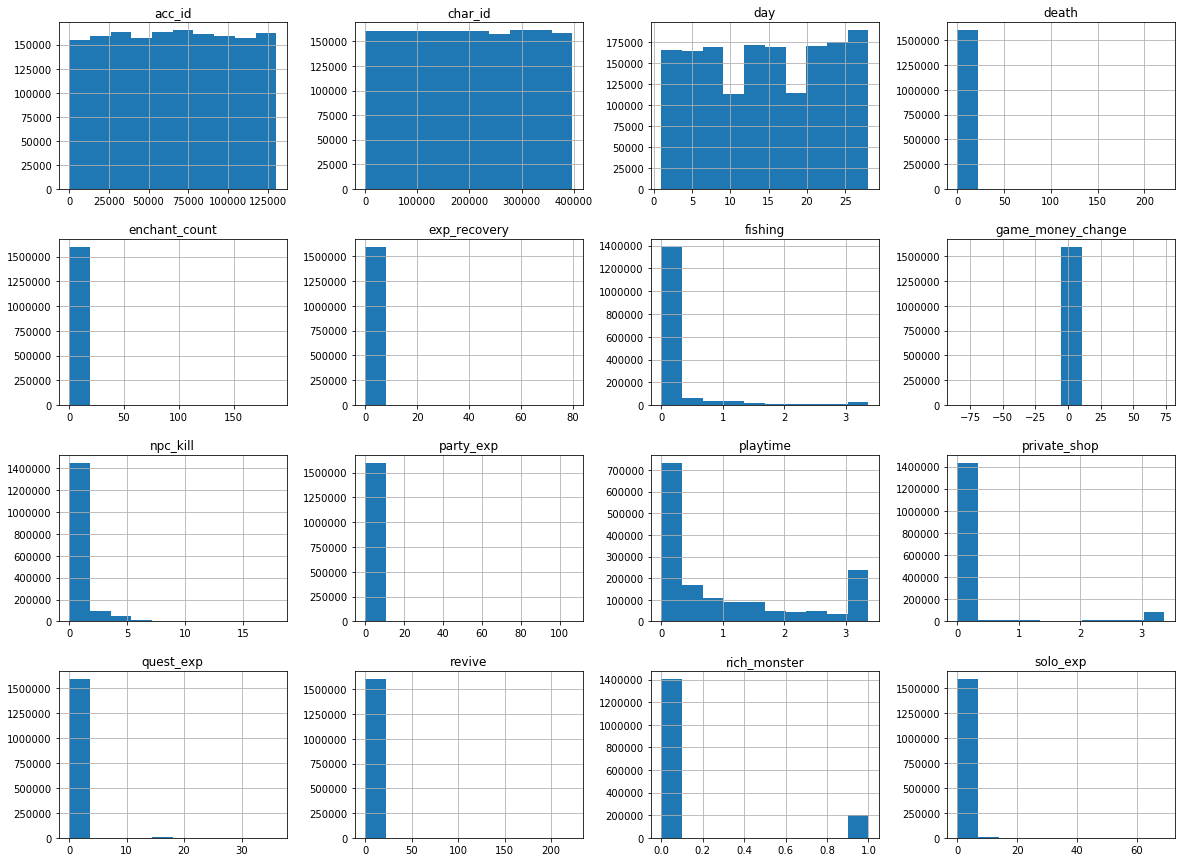

In [37]:
train_activity[train_activity['server']!='bs'].hist(figsize=(20,15))

In [83]:
train_pledge[train_pledge['server']=='aa']

,day,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
0,1,106660,345122,aa,381,0.036089,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.007078,0.027568,0.000000
1,1,46383,161773,aa,10892,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006139
2,1,18495,321373,aa,13705,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000347
3,1,118293,366707,aa,2982,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001042
4,1,50421,158063,aa,27104,0.216536,0.072179,0.000000,0.000000,0.000000,0.000000,0.098883,0.056626,0.083978,0.000000
5,1,102278,168345,aa,27104,0.216536,0.072179,0.000000,0.000000,0.000000,0.000000,0.098883,0.056626,0.083978,0.000000
6,1,91029,111534,aa,27104,0.216536,0.072179,0.000000,0.000000,0.000000,0.000000,0.098883,0.056626,0.083978,0.000000
7,1,58956,301401,aa,20088,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003243
8,1,95265,192036,aa,5776,0.072179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037066
9,1,26882,25000,aa,5343,0.180447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065213


In [325]:
com_act_40000.columns

Index(['acc_id', 'day', 'char_id', 'class', 'level', 'pledge_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
       'same_pledge_cnt', 'etc_cnt', 'num_opponent', 'playtime', 'npc_kill',
       'solo_exp', 'party_exp', 'quest_exp', 'rich_monster', 'death', 'revive',
       'exp_recovery', 'fishing', 'private_shop', 'game_money_change',
       'enchant_count'],
      dtype='object')

In [326]:
# 1. 모든 변수를 접속횟수로 나누기
# 별 쓸모 없음.. 
# 생존기간과의 상관관계: 0.272280 -> 0.246307, 
# 총결제량과의 상관관계: -0.012882 -> -0.029617
# 일결제량, 이탈여부 모두 떨어짐
# 전반적으로 일평균보다는 전체 합계가 중요하다는 결론.
def char_day_count(sub, data):    
    char_count = sub.groupby(['day','acc_id'])['char_id'].count()
    char_count = char_count.reset_index()
    char_count = char_count.groupby('acc_id').count()
    char_count = char_count.reset_index()
    char_count.rename(columns={'day':'day_count','char_id':'char_count'},inplace=True)
    data2 = pd.merge(data, char_count, on = ['acc_id'])
    return data2
com_act = pd.merge(train_combat, train_activity, on=['acc_id','char_id','day'], how='inner')
com_act_40000 = com_act.groupby('acc_id').sum().reset_index()
com_act_40000_add = char_day_count(train_activity,com_act_40000)
#act_40000 = train_activity.groupby('acc_id').sum().reset_index()
#act_40000_add = char_day_count(train_activity,act_40000)

for col in ['pledge_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
       'same_pledge_cnt', 'etc_cnt', 'num_opponent', 'playtime', 'npc_kill',
       'solo_exp', 'party_exp', 'quest_exp', 'rich_monster', 'death', 'revive',
       'exp_recovery', 'fishing', 'private_shop', 'game_money_change',
       'enchant_count']:   
    col_mean = col + '_mean'
    com_act_40000_add[col_mean] = com_act_40000_add[col] / com_act_40000_add['day_count']
    
#act_40000_add['play_mean'] = act_40000_add['playtime'] / act_40000_add['day_count']
#act_40000_add['death_mean'] = act_40000_add['death'] / act_40000_add['day_count']
#act_40000_add['npc_kill_mean'] = act_40000_add['npc_kill'] / act_40000_add['day_count']
#act_40000_add['solo_exp_mean'] = act_40000_add['solo_exp'] / act_40000_add['day_count']
#act_40000_add['party_exp_mean'] = act_40000_add['party_exp'] / act_40000_add['day_count']
#act_40000_add['quest_exp_mean'] = act_40000_add['quest_exp'] / act_40000_add['day_count']
#act_40000_add['rich_monster_mean'] = act_40000_add['rich_monster'] / act_40000_add['day_count']
#act_40000_add['revive_mean'] = act_40000_add['revive'] / act_40000_add['day_count']
#act_40000_add['private_shop_mean'] = act_40000_add['private_shop'] / act_40000_add['day_count']
#act_40000_add['fishing_mean'] = act_40000_add['fishing'] / act_40000_add['day_count']
#act_40000_add['game_money_change_mean'] = act_40000_add['game_money_change'] / act_40000_add['day_count']
#act_40000_add['enchant_count_mean'] = act_40000_add['enchant_count'] / act_40000_add['day_count']


In [436]:
act_40000_test = pd.merge(stop_count_40000, train_label, on ='acc_id')
#.drop(['Unnamed: 0','acc_id','char_id','day'],axis=1)
cor = act_40000_test.corr()
cor['stop'].sort_values(ascending=False)

stop             1.000000
secession        0.218682
amount_spent     0.043130
acc_id           0.006998
total_spent     -0.064597
Unnamed: 0      -0.101217
survival_time   -0.208341
login           -0.330067
day                   NaN
Name: stop, dtype: float64

In [100]:
cor['playtime'].sort_values(ascending=False)

playtime             1.000000
play_mean            0.975503
char_count           0.572370
day_count            0.572370
private_shop         0.530384
npc_kill             0.301763
survival_time        0.272280
Unnamed: 0           0.221499
fishing              0.180046
char_id              0.142523
day                  0.139839
death                0.099679
revive               0.071479
party_exp            0.047175
enchant_count       -0.001402
acc_id              -0.002883
total_spent         -0.012882
game_money_change   -0.030948
exp_recovery        -0.061564
rich_monster        -0.065355
amount_spent        -0.073376
quest_exp           -0.163277
solo_exp            -0.178753
secession           -0.263874
Name: playtime, dtype: float64

In [103]:
train_activity.columns

Index(['day', 'acc_id', 'char_id', 'server', 'playtime', 'npc_kill',
       'solo_exp', 'party_exp', 'quest_exp', 'rich_monster', 'death', 'revive',
       'exp_recovery', 'fishing', 'private_shop', 'game_money_change',
       'enchant_count'],
      dtype='object')

In [174]:
com_act.columns

Index(['acc_id', 'char_id', 'level', 'class', 'day', 'pledge_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
       'same_pledge_cnt', 'etc_cnt', 'num_opponent', 'playtime', 'npc_kill',
       'solo_exp', 'party_exp', 'quest_exp', 'rich_monster', 'death', 'revive',
       'exp_recovery', 'fishing', 'private_shop', 'game_money_change',
       'enchant_count'],
      dtype='object')

In [232]:
com_act.shape

(1574671, 26)

In [285]:
# 3. 전체  - 주캐  (나누는 건 더 나쁨) 안 빼고 그냥 주캐 시간만 추가하는 게 제일 나음
# 전반적으로 주캐 값만 쓰는 게 더 낫지만 엎치락 뒤치락 하는 경우도 있음

# 1) activity에 combat에 없는 서버 활동 지우고 합치기
com_act = pd.merge(train_combat, train_activity, on=['acc_id','char_id','day'], how='inner')
com_act_40000 = com_act.groupby('acc_id').sum().reset_index()
# 2) 레벨로 나누기
## 사용자 별로 레벨 최고인 캐릭터의 활동데이터 선정하는 컬럼 뽑기

# 2) 주캐와 부캐로 나눠서 sum (부캐가 없으면? =1)
com_act2 = com_act.groupby('acc_id')['level'].max().reset_index()
column = com_act[['acc_id','level','pledge_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
       'same_pledge_cnt', 'etc_cnt', 'num_opponent', 'playtime', 'npc_kill',
       'solo_exp', 'party_exp', 'quest_exp', 'rich_monster', 'death', 'revive',
       'exp_recovery', 'fishing', 'private_shop', 'game_money_change',
       'enchant_count']]
com_act3 = pd.merge(com_act2,column, on=['acc_id','level'], how ='inner')
com_act3 = com_act3.groupby('acc_id').sum().reset_index()
act_40000_max = pd.merge(com_act_40000, com_act3, on=['acc_id'])

# 4) (전체 - 주케)
#for col in ['pledge_cnt',
#       'random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
#       'same_pledge_cnt', 'etc_cnt', 'num_opponent', 'playtime', 'npc_kill',
#       'solo_exp', 'party_exp', 'quest_exp', 'rich_monster', 'death', 'revive',
#       'exp_recovery', 'fishing', 'private_shop', 'game_money_change',
#       'enchant_count']:   
#    col_x = col + '_x'
#    col_y = col + '_y'
    
   # act_40000_max[col_y] = act_40000_max[col_x] - act_40000_max[col_y]

In [111]:
# 7. 생존과 부활 비교
# 1) 활동 데이터의 death - revive 컬럼 추가
# survival_time: -0.088656 (death = -0.004280, revive = 0.005763)
# total_spent : -0.084527 (death = 0.069743, revive = 0.080267)
# amount_spent: -0.031238 (death = -0.005295, revive = -0.001805)
# secession: 0.092756 (death = 0.025378, revive = 0.015138)
# 결론: 최대 10배 이상의 효과!!
act_40000 = train_activity.groupby(['acc_id']).sum().reset_index()
act_40000['forgive'] = act_40000['death'] - act_40000['revive']

In [322]:
act_40000_test = pd.merge(act_40000, train_label, on ='acc_id')
cor = act_40000_test.corr()
cor['secession'].sort_values(ascending=False)

secession            1.000000
solo_exp             0.161375
party_exp            0.117304
quest_exp            0.109560
Unnamed: 0           0.086894
amount_spent         0.058308
death                0.025378
revive               0.015138
game_money_change    0.009266
acc_id               0.002341
enchant_count       -0.001916
exp_recovery        -0.010137
npc_kill            -0.128968
rich_monster        -0.153172
char_id             -0.173356
fishing             -0.179402
day                 -0.195488
private_shop        -0.254191
playtime            -0.263874
total_spent         -0.266477
survival_time       -0.869090
Name: secession, dtype: float64

In [301]:
# 4. 전투로 인해 죽었는가, 사냥에서 죽었는가 (가려내기가 힘들다)
com_act[(com_act['death']!=0) & (com_act['npc_kill']==0) & (com_act['rich_monster']==0)]

,day,acc_id,char_id,server_x,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,...,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
37,1,77519,363511,ae,5,11,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0,0.245883,0.247337,0.0,0.000000,0.0,-0.000802,0.0
154,1,3383,129392,ar,1,0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0,0.245883,0.247337,0.0,0.000000,0.0,0.000000,0.0
820,1,82028,5301,ap,3,16,0.000000,0.0,0.000000,0.959456,...,0.002220,0.000000,0,0.245883,0.247337,0.0,0.000000,0.0,0.000000,0.0
822,1,82028,5301,bl,3,16,1.989712,0.0,0.000000,0.000000,...,0.002220,0.000000,0,0.245883,0.247337,0.0,0.000000,0.0,0.000000,0.0
1785,1,125562,355077,am,1,2,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0,0.983534,0.989348,0.0,0.000000,0.0,0.000098,0.0
2105,1,101043,339469,ao,3,16,0.000000,0.0,0.000000,0.000000,...,0.052417,0.000000,0,0.245883,0.247337,0.0,0.000000,0.0,0.001054,0.0
2224,1,17575,141313,aa,3,17,0.000000,0.0,0.000000,0.000000,...,0.000051,0.000000,0,0.245883,0.247337,0.0,0.000000,0.0,0.000000,0.0
2226,1,17575,141313,bk,3,17,2.118080,0.0,0.000000,1.439183,...,0.000051,0.000000,0,0.245883,0.247337,0.0,0.000000,0.0,0.000000,0.0
2776,1,62438,303133,ag,1,1,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0,0.245883,0.000000,0.0,0.000000,0.0,0.000000,0.0
3123,1,42561,134672,ao,1,11,0.000000,0.0,0.000000,0.000000,...,0.790830,0.000000,0,0.245883,0.247337,0.0,0.000000,0.0,-0.001343,0.0


In [318]:
# 13. 전체 특성 일수 세기
# 효과 대박임 !!

com_act = pd.merge(train_combat, train_activity, on=['acc_id','char_id','day'], how='inner').drop(['server_x','server_y'],axis=1)
feature_count = com_act.groupby(['acc_id','day']).sum().reset_index()
for col in ['pledge_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
       'same_pledge_cnt', 'etc_cnt', 'num_opponent', 'playtime',
       'npc_kill', 'solo_exp', 'party_exp', 'quest_exp', 'rich_monster',
       'death', 'revive', 'exp_recovery', 'fishing', 'private_shop',
       'game_money_change', 'enchant_count']:
    col_count = col + '_count'
    feature_count[col_count] = 0
for col in ['pledge_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
       'same_pledge_cnt', 'etc_cnt', 'num_opponent', 'playtime',
       'npc_kill', 'solo_exp', 'party_exp', 'quest_exp', 'rich_monster',
       'death', 'revive', 'exp_recovery', 'fishing', 'private_shop',
       'game_money_change', 'enchant_count']:
    col_count = col + '_count'
    feature_count[col_count] = np.where(feature_count[col]!=0,1,0)
    
feature_count = feature_count.groupby('acc_id').sum().reset_index()

In [384]:
acc_id = train_activity[['acc_id','playtime']]
acc_id = acc_id.groupby('acc_id').sum().reset_index()
acc_id = acc_id['acc_id']
acc_id = acc_id.values

In [386]:
acc_id.shape

(40000,)

In [418]:
# 9. 접속 중단 횟수

# 실제 접속일  데이터
real_day = train_activity[['acc_id','day','playtime']]
real_day = real_day.groupby(['acc_id','day']).sum().reset_index()
# 전체 일자 데이터 (40000*28)
day = np.zeros(shape=(40000*28,2))

# acc_id 40000개 추출
acc_id = train_activity[['acc_id','playtime']]
acc_id = acc_id.groupby('acc_id').sum().reset_index()
acc_id = acc_id['acc_id']
acc_id = acc_id.values

# day에 acc_id와 1~28일 입력 후 데이터프레임으로 변환
for i in range(0,40000):
    for j in range(0,28):
        n = 28*i+j
        day[n][0] = acc_id[i]
        day[n][1] = j+1
day_df = DataFrame(day, columns=['acc_id','day'])

# 만든 데이터프레임에 실제 접속일 데이터 merge
stop_count_df = pd.merge(day_df, real_day,  on=['acc_id','day'],how='outer')
# 접속하지 않은 날은 0, 접속일은 1로 표시
stop_count_df['login'] = np.where(stop_count_df['playtime'].isnull(), 0, 1)
stop_count_df['stop'] = 0
#stop_count_df['day'] = np.where(stop_count_df['playtime'].isnull(), 0, stop_count_df['day'])
# 이제 필요 없는 playtime 제거

stop_count_df = stop_count_df.drop('playtime',axis=1)

In [437]:
act_40000_test[act_40000_test['acc_id']==5]

,acc_id,day,login,stop,Unnamed: 0,survival_time,amount_spent,secession,total_spent
1,5.0,406.0,10.0,3.0,12651,60,0.0,1,0.0


In [443]:
stop_count_df

,acc_id,day,login,stop
0,2.0,1.0,1.0,0.0
1,2.0,2.0,1.0,0.0
2,2.0,3.0,1.0,0.0
3,2.0,4.0,1.0,0.0
4,2.0,5.0,1.0,0.0
5,2.0,6.0,1.0,0.0
6,2.0,7.0,1.0,0.0
7,2.0,8.0,1.0,0.0
8,2.0,9.0,1.0,0.0
9,2.0,10.0,1.0,0.0


In [440]:
act_40000_test

,acc_id,day,login,stop,survival_time,amount_spent,secession,total_spent
0,2.0,406.0,28.0,0.0,64,0.000000,0,0.000000
1,5.0,406.0,10.0,3.0,60,0.000000,1,0.000000
2,8.0,406.0,28.0,0.0,64,0.020310,0,1.299843
3,17.0,406.0,28.0,0.0,64,0.070642,0,4.521100
4,20.0,406.0,27.0,1.0,64,0.052137,0,3.336752
5,21.0,406.0,26.0,1.0,64,0.184267,0,11.793078
6,31.0,406.0,28.0,0.0,45,0.051316,1,2.309242
7,38.0,406.0,27.0,1.0,64,0.517168,0,33.098736
8,41.0,406.0,1.0,0.0,3,0.000000,1,0.000000
9,43.0,406.0,27.0,1.0,64,0.356197,0,22.796592


In [421]:
stop_count_df.columns

Index(['acc_id', 'day', 'login', 'stop'], dtype='object')

In [424]:
stop_count_np = stop_count_df.values

for i in range(0,len(stop_count_df)-1):
    if stop_count_np[i+1][2] - stop_count_np[i][2] == 1:
        stop_count_np[i+1][3] = 1
for i in range(0,40000):
    if stop_count_np[i*28][2] == 0:
        stop_count_np[i*28][3] = -1
stop_count_df = DataFrame(stop_count_np, columns = ['acc_id', 'day', 'login', 'stop'])

In [428]:
stop_count_40000

,acc_id,day,login,stop
0,2.0,406.0,28.0,0.0
1,5.0,406.0,10.0,3.0
2,8.0,406.0,28.0,0.0
3,17.0,406.0,28.0,0.0
4,20.0,406.0,27.0,1.0
5,21.0,406.0,26.0,1.0
6,31.0,406.0,28.0,0.0
7,38.0,406.0,27.0,1.0
8,41.0,406.0,1.0,0.0
9,43.0,406.0,27.0,1.0
